<a href="https://colab.research.google.com/github/augustoberwaldt/analise-de-sentimento/blob/main/analise_de_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Wed Aug 24 02:31:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |            

In [2]:
!pip install google_play_scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

Defina os IDs dos apps a serem analisados e extraia informações básicas sobre cada um deles.

In [9]:
apps_ids = ['com.nu.production', 'br.com.intermedium', 'com.c6bank.app', 'br.com.original.bank', 'br.com.bancobmg.bancodigital', 'br.com.bradesco.next']


app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(6)

100%|██████████| 6/6 [00:02<00:00,  2.36it/s]


,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Nubank: conta, cartão e mais",O Nubank nasceu para acabar com a complexidade...,O Nubank nasceu para acabar com a complexidade...,Credit card with no annual fee and digital acc...,"100,000,000+",100000000,100316058,4.596354,1932825,1143,...,None,False,False,"Apr 25, 2014",1660939286,Varies with device,O roxo ficou mais roxo. O simples ficou mais s...,O roxo ficou mais roxo. O simples ficou mais s...,com.nu.production,https://play.google.com/store/apps/details?id=...
1,Inter: Cartão de Crédito e Pix,Muito mais que um banco digital. Um Super App ...,Muito mais que um banco digital. Um Super App ...,"Digital Account, Credit Card, Pix, Investments...","10,000,000+",10000000,38737179,4.755172,1386645,874,...,None,False,False,"May 4, 2016",1660845182,11.2.5,"Essa nova versão é rapidinha, vapt vupt, pra r...","Essa nova versão é rapidinha, vapt vupt, pra r...",br.com.intermedium,https://play.google.com/store/apps/details?id=...
2,C6 Bank,Abra sua conta grátis no C6 Bank: um banco dig...,Abra sua conta grátis no C6 Bank: um banco dig...,"Full digital bank with free credit card, digit...","10,000,000+",10000000,30296454,3.570000,473952,408,...,None,False,False,"May 15, 2019",1661204837,Varies with device,A melhor experiência para sua vida financeira\...,A melhor experiência para sua vida financeira<...,com.c6bank.app,https://play.google.com/store/apps/details?id=...
3,Original Instantâneo e Digital,O Original é fácil de entender e simples de us...,O Original é fácil de entender e simples de us...,A complete and 100% digital bank. Being Origin...,"10,000,000+",10000000,15091912,4.180000,264340,180,...,None,False,False,"Aug 10, 2015",1660223522,3.20.0,Ser Original faz toda a diferença. Nessa atual...,Ser Original faz toda a diferença. Nessa atual...,br.com.original.bank,https://play.google.com/store/apps/details?id=...
4,Bmg Conta Digital: Empréstimos,<b>Fazer Pix ficou ainda melhor com a conta di...,<b>Fazer Pix ficou ainda melhor com a conta di...,Bmg just turned 92! Almost a century changing ...,"10,000,000+",10000000,14094431,4.100000,191708,136,...,None,False,False,"Mar 19, 2019",1660224833,3.40.3,None,None,br.com.bancobmg.bancodigital,https://play.google.com/store/apps/details?id=...
5,Banco next: Conta e Cartão,"O next é uma plataforma 100% digital, gratuito...","O next é uma plataforma 100% digital, gratuito...",The next is a complete digital account with fr...,"10,000,000+",10000000,27520514,3.710000,388597,443,...,None,False,False,"Mar 25, 2014",1659577000,30.33.1,Estamos sempre melhorando nosso app! Nessa atu...,Estamos sempre melhorando nosso app! Nessa atu...,br.com.bradesco.next,https://play.google.com/store/apps/details?id=...


100%|██████████| 6/6 [00:24<00:00,  4.14s/it]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


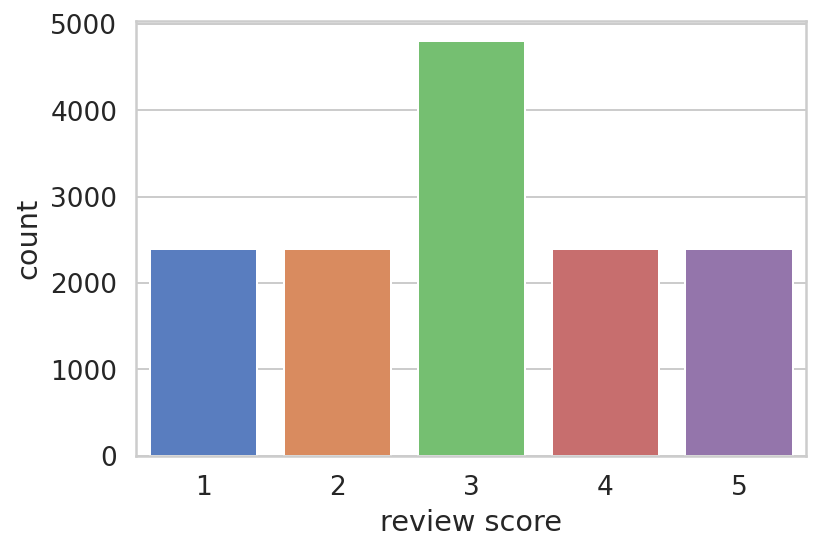

In [10]:
app_reviews = []

for ap in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='pt',
                country='br',
                sort=sort_order,
                count= 400 if score == 3 else 200,
                filter_score_with=score
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)


df = pd.DataFrame(app_reviews)
sns.countplot(df.score)
plt.xlabel('review score');

In [11]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

df['sentiment'] = df.score.apply(to_sentiment)

In [12]:
class_names = ['negative', 'neutral', 'positive']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


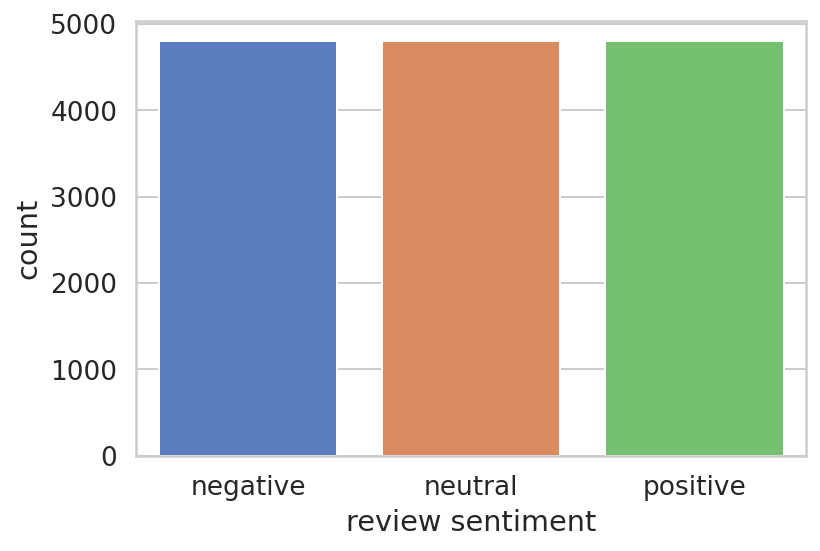

In [13]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [14]:

from google.colab import  drive
df.to_csv('reviews.csv', index=None, header=True)